In [ ]:
# номер варианта

variant = 1%12+1
variant # 2 => car evaluation

2

# 1-ое задание

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas, seaborn


In [ ]:
csv_table = pandas.read_csv('car.data',header=None)
csv_table.rename(columns={0:'buying', 1: 'maint', 2: 'doors', 3: 'persons', 4:'lug_boot', 5: 'safety', 6: 'class_label'}, inplace=True)
df = pandas.DataFrame(csv_table)
df.head()

,buying,maint,doors,persons,lug_boot,safety,class_label
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
# количество пропущенных значений

df.isnull().sum(axis = 0)

buying         0
maint          0
doors          0
persons        0
lug_boot       0
safety         0
class_label    0
dtype: int64

In [ ]:
# распределение классов

df['class_label'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class_label, dtype: int64

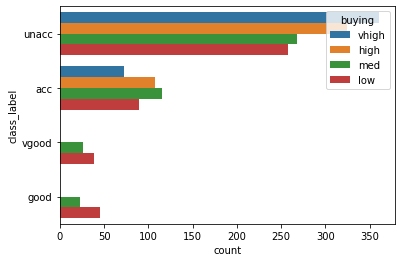

In [ ]:
# распределение классов по признакам (attributes)

## признак buying

seaborn.countplot(y='class_label', hue='buying', data=df)

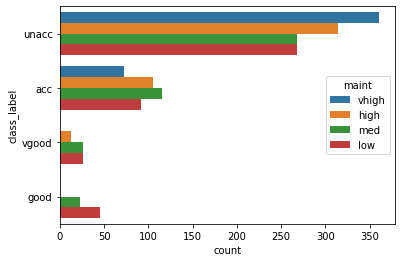

In [ ]:
## признак maint

seaborn.countplot(y='class_label', hue='maint', data=df)

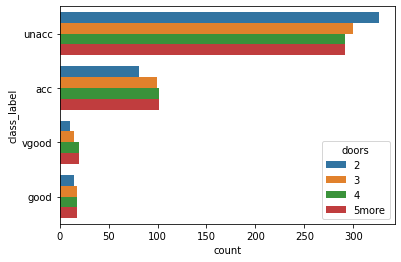

In [ ]:
## признак doors

seaborn.countplot(y='class_label', hue='doors', data=df)

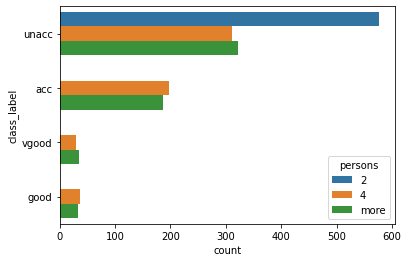

In [ ]:
## признак persons
seaborn.countplot(y='class_label', hue='persons', data=df)

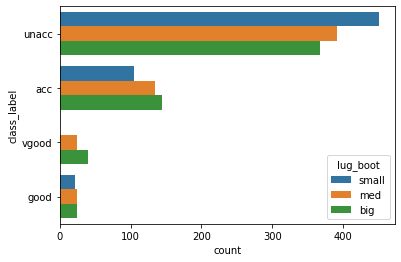

In [ ]:
## признак lug_boot

seaborn.countplot(y='class_label', hue='lug_boot', data=df)

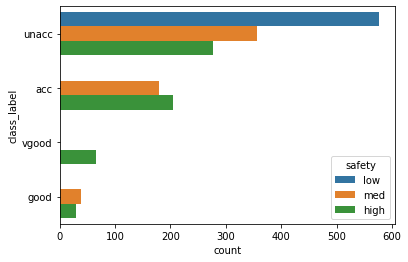

In [ ]:
## признак safety

seaborn.countplot(y='class_label', hue='safety', data=df)

In [ ]:
df.shape

(1728, 7)

**Выводы по первому заданию:** статистику по переменным, классы, количество объектов, количество
пропущенных значений.

1) в датасете только категориальные переменные;
2) распределение классов неравномерное: очень сильно преобладает количество объектов класса unacc, в то время как количество объектов других классов небольшое;
3) всего объектов 1727, пропущенных значений нет.

# 2-ое задание

In [ ]:
# разделение на обучающую и тестовую выборки

X = df.drop(columns=['class_label'])
y = df.class_label

## кодируем значения переменных

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
dicts = {}

label.fit(X['buying'].drop_duplicates())
dicts['buying'] = list(label.classes_)
X['buying'] = label.transform(X['buying'])

label.fit(X['maint'].drop_duplicates())
dicts['maint'] = list(label.classes_)
X['maint']= label.transform(X['maint'])

label.fit(X['lug_boot'].drop_duplicates())
dicts['lug_boot'] = list(label.classes_)
X['lug_boot'] = label.transform(X['lug_boot'])

label.fit(X['safety'].drop_duplicates())
dicts['safety'] = list(label.classes_)
X['safety'] = label.transform(X['safety'])

label.fit(X['doors'].drop_duplicates())
dicts['doors'] = list(label.classes_)
X['doors'] = label.transform(X['doors'])

label.fit(X['persons'].drop_duplicates())
dicts['persons'] = list(label.classes_)
X['persons'] = label.transform(X['persons'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3)
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
y_train.value_counts()

unacc    965
acc      306
good      56
vgood     55
Name: class_label, dtype: int64

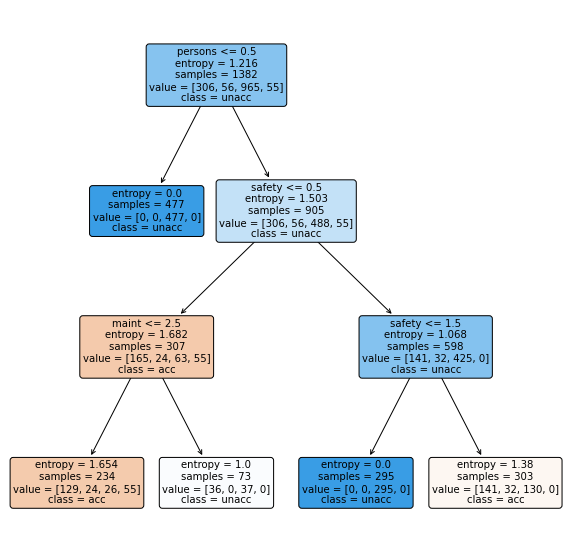

In [ ]:
plt.figure(figsize=(10, 10))
plot_tree(tree, feature_names=X_train.columns, rounded=True, filled=True, class_names=['acc',
                                                                         'good',
                                                                         'unacc',
                                                                         'vgood'])
plt.show()

In [ ]:
accuracy_score(y_train, tree.predict(X_train))

0.7807525325615051

In [ ]:
accuracy_score(y_test, tree.predict(X_test))

0.7774566473988439

Если машина для двух пассажиров и меньше, то она не приемлима (unacc).
Если машина вмещает больше чем 2 пассажира, имеет высокий уровень безопасности и не самый высокий уровень тех обслуживания (maint), то она приемлима.
Если машина вмещает больше чем 2 пассажира, имеет высокий уровень безопасности и самый высокий уровень тех обслуживания, то она приемлима.
Если машина вмещает больше чем 2 пассажира, имеет низкий уровень безопасности, то она неприемлема.
Если машина вмещает больше чем 2 пассажира, имеет средний уровень безопасности, то она приемлема.


# 3-ое задание

In [ ]:
# зависимость качества решения (на обучении) от глубины дерева

scores = []
for depth in range(3, 20):
  tree = DecisionTreeClassifier(max_depth=depth, random_state=1)
  tree.fit(X_train, y_train)
  scores += [accuracy_score(y_train, tree.predict(X_train))]
def plot_dependence(tit,scores,xlab,ylab,num):
  plt.plot(range(3, num), scores)
  plt.title(tit)
  plt.xlabel(xlab)
  plt.ylabel(ylab)
  plt.show()

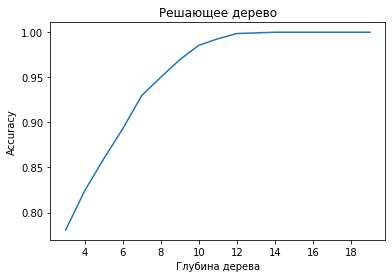

In [ ]:
plot_dependence('Решающее дерево',scores,'Глубина дерева','Accuracy',num=20)

Т.о. можно сделать вывод что модель переобучается примерно на 12 вершинах (точность 100%).

In [ ]:
# зависимость качества решения (на скользящем контроле) от глубины дерева

valid_scores = []
for depth in range(3, 20):
  clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
  valid_scores += [cross_val_score(clf, X, y, cv=5).mean()]

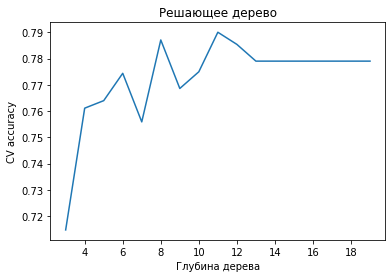

In [ ]:
plot_dependence('Решающее дерево',valid_scores,'Глубина дерева','CV accuracy',num=20)

На 11-ом дереве достигается максимальная точность, но затем она падает.

In [ ]:
# влияние переменных
dict(zip(X.columns, sorted(tree.feature_importances_, reverse=False)))

{'buying': 0.06273652824179206,
 'doors': 0.1882217415077373,
 'lug_boot': 0.20688882392526037,
 'maint': 0.09537311296978118,
 'persons': 0.19567703508637307,
 'safety': 0.251102758269056}

Наиболее повлиявшие переменные: 'safety', 'lug_boot', 'doors', 'persons'.

# 4-ое задание

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
boosting = GradientBoostingClassifier(n_estimators=10, random_state=1,max_depth=3)
boosting.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=10, random_state=1)

In [ ]:
accuracy_score(y_train, boosting.predict(X_train))

0.7720694645441389

In [ ]:
accuracy_score(y_test, boosting.predict(X_test))

0.7687861271676301

In [ ]:
# значимость переменных
dict(zip(X_train.columns, sorted(boosting.feature_importances_, reverse=False)))

{'buying': 0.0017186453620395834,
 'doors': 0.05206668242509774,
 'lug_boot': 0.3470688611132917,
 'maint': 0.01776485019310712,
 'persons': 0.07509273110841254,
 'safety': 0.5062882297980512}

Наиболее значимые переменные: 'safety', 'lug_boot'.

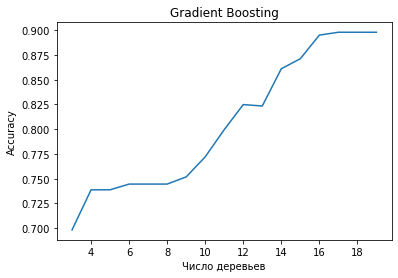

In [ ]:
# зависимость качества решения (на обучении) от числа деревьев

boost_scores = []
for num_trees in range(3, 20):
  boosting = GradientBoostingClassifier(n_estimators=num_trees, random_state=48,max_depth=3)
  boosting.fit(X_train, y_train)
  boost_scores += [accuracy_score(y_train, boosting.predict(X_train))]

plot_dependence('Gradient Boosting',boost_scores,'Число деревьев','Accuracy',num=20)

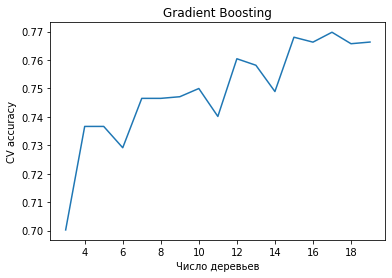

In [ ]:
# зависимость качества решения (на скользящем контроле) от числа деревьев

valid_boost_scores = []
for num_trees in range(3, 20):
  clf = GradientBoostingClassifier(n_estimators=num_trees, random_state=48,max_depth=3)
  valid_boost_scores += [cross_val_score(clf, X, y, cv=5).mean()]

plot_dependence('Gradient Boosting',valid_boost_scores,'Число деревьев','CV accuracy',num=20)

При увеличении числа деревьев, точность Gradient Boosting растёт как на обучающей выборке, так и на скользящем контроле (кросс-валидации), максимальной она становится при 17 деревьях. При этом точность оказалась сопоставимой с случаем использования лишь одного дерева.

# 5-ое задание

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10, random_state=48)
rfc.fit(X_train, y_train)
accuracy_score(y_train, rfc.predict(X_train))

0.9985528219971056

In [ ]:
accuracy_score(y_test, rfc.predict(X_test))

0.9624277456647399

In [ ]:
# значимость переменных
dict(zip(X_train.columns, sorted(rfc.feature_importances_, reverse=False)))

{'buying': 0.0624934798367207,
 'doors': 0.14170564316337791,
 'lug_boot': 0.238932586698776,
 'maint': 0.07795759502303866,
 'persons': 0.2115861370850281,
 'safety': 0.2673245581930586}

Наиболее значимые переменные: 'persons', 'safety'.

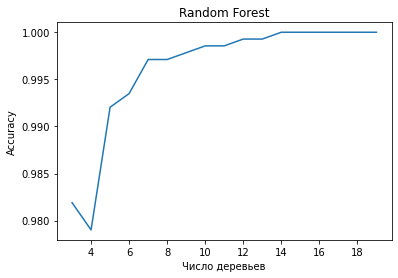

In [ ]:
# зависимость качества решения (на обучении) от числа деревьев

rfc_scores = []
for num_trees in range(3, 20):
  rfc = RandomForestClassifier(n_estimators=num_trees, random_state=48)
  rfc.fit(X_train, y_train)
  rfc_scores += [accuracy_score(y_train, rfc.predict(X_train))]

plot_dependence('Random Forest',rfc_scores,'Число деревьев','Accuracy',num=20)

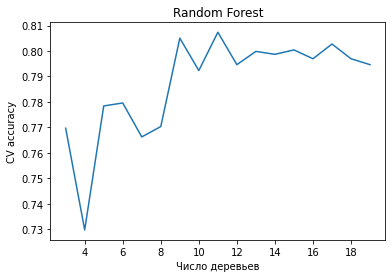

In [ ]:
# зависимость качества решения (на скользящем контроле) от числа деревьев

rfc_scores_cv = []

for num_trees in range(3, 20):
  rfc_clf = RandomForestClassifier(n_estimators=num_trees, random_state=48)
  rfc_clf.fit(X_train, y_train)
  rfc_scores_cv += [cross_val_score(rfc_clf, X, y, cv=5).mean()]

plot_dependence('Random Forest',rfc_scores_cv,'Число деревьев','CV accuracy',num=20)

Выводы: на обучающей выборке при большом количестве деревьев алгоритм переобучается (точность 100%), на скользящем контроле accuracy выше, чем у модель с Gradient Boosting и одного дерева.